In [42]:
import numpy as np
import pandas as pd
import operator

# 导入数据

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("movie.csv", encoding='gbk')
df

,电影名称,打斗次数,接吻次数,电影类型
0,California Man,3,104,Romenance
1,He's Not Really into Dudes,2,100,Romenance
2,Beautiful Women,1,81,Romenance
3,Kwvin Longblade,101,10,Action
4,Robo Slayer 3000,99,5,Action
5,Amped II?,98,2,Action


# 将文本数据整理成算法需要的数据形式

In [10]:
df1=df.drop('电影类型',axis=1)#将电影类型这一列暂且删掉
dateset=df1.as_matrix() #将pandas数据转换成矩阵并传递给训练集
labels=df["电影类型"]#将电影类型传递给labels（即标签）
print(dateset)
print(labels)

[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
0    Romenance
1    Romenance
2    Romenance
3       Action
4       Action
5       Action
Name: 电影类型, dtype: object


# 数据分析—可视化

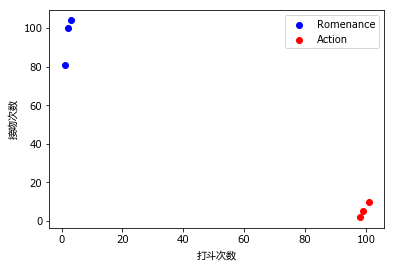

In [39]:
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

import matplotlib.pyplot as plt

#将romance和action数据分开来，是为了作图的时候可以给予不同的颜色显示
Romenance_x = [dateset[ii][0] for ii in range(0, len(dateset)) if labels[ii]=="Romenance"]
Romenance_y = [dateset[ii][1] for ii in range(0, len(dateset)) if labels[ii]=="Romenance"]
Action_x = [dateset[ii][0] for ii in range(0, len(dateset)) if labels[ii]=="Action"]
Action_y = [dateset[ii][1] for ii in range(0, len(dateset)) if labels[ii]=="Action"]

plt.scatter(Romenance_x,Romenance_y, color = "b", label="Romenance")
plt.scatter(Action_x,Action_y, color = "r", label="Action")
plt.legend()
plt.xlabel("打斗次数",fontproperties=myfont)
plt.ylabel("接吻次数",fontproperties=myfont)
plt.show()

# 测试算法

In [66]:
inX = [18,90]#给定待预测的值
datesize=df1.shape[0]#算出df1的列数
#欧式距离的求取
diffMat = np.tile(inX, (datesize, 1))-dateset#将待预测值与已有的数据做差
sqDiffMat = diffMat ** 2
sqDistance = sqDiffMat.sum(axis=1)#对数组中的元素按行进行相加
distance = sqDistance ** 0.5
sortedDistIndicies = distance.argsort()#argsort函数返回的是数组值从小到大的索引值
classCount = {}#存放最终的分类结果
for i in range(3):#这里的3就是k值
    voteIlabel = labels[sortedDistIndicies[i]]#是第i个最相近的数据对应的分类
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
#把分类结果进行排序，然后返回得票数最多的分类结果
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
sortedClassCount[0][0]

'Romenance'